### Introduction to Data Science
### Spring 2020

### Pandas Basics

This is an introductory lab on Python/Pandas. The purpose of this lab is to learn how to use 
some basic commands in Pandas in your data science projects. We will do some data analysis with a real dataset of babynames. This lab is presented as a Jupyter notebook. 
This notebook has multiple tasks that you need to complete. To complete a task, just double click on the cell (notebook must be opened in Jupyter) and enter your answer. Be sure to save the notebook often (ctrl-S) to make sure you code is saved and executes correctly.
Please execute the cells (SHIFT-ENTER) that are already completed and then your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###


### Running a Cell 

Try running the following cell.  If you are unfamiliar with Jupyter Notebooks, consider skimming [this tutorial](http://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb) or selecting **Help -> User Interface Tour** in the menu above. TO run the cell below, place the cursor on the cell and press (SHIFT-ENTER) or choose Run from the Jupyter menu above.
### IMPORTANT
It is important that you run this notebook sequentially. That is, if you get an error from a cell, be sure to check if the cells before the error cell has been executed. In most cases, if a state of a variable is not initialized, then it can cause the cell execution to throw an error message.

### Jupyter Shortcuts

Even if you are familiar with Jupyter, we strongly encourage you to become proficient with keyboard shortcuts (this will save you time in the future). To learn about keyboard shortcuts, go to **Help -> Keyboard Shortcuts** in the menu above. 

Here are a few we like:
1. `ctrl`+`return` : *Evaluate the current cell*
1. `shift`+`return`: *Evaluate the current cell and move to the next*
1. `esc` : *command mode* (may need to press before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `dd` : *delete a cell*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

### Hello World
This is the first code you write in any language. In python, it is really simple. Execute the code (shift-enter) to see the output cell below the code.

In [7]:
print("Hello World!")

Hello World!


## Task 1 - Pandas Basics

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (ie. selecting rows and columns)
* Filtering data (using boolean arrays)
* Data Aggregation/Grouping dataframes
* Merging dataframes

In following tasks, you are going to use several pandas methods like `drop()`, `loc[]`, `groupby()`. You may press `shift+tab` on the method parameters to see the documentation for that method.

**Just as a side note**: Pandas operations can be confusing at times and the documentation is not that great, but it is OK to be stumped when figuring out why a piece of code is not doing what it's supposed to. We don't expect you to memorize all the different Pandas functions, just know the basic ones like `iloc[]`, `loc[]`, slicing, and other general dataframe operations. For exams and quizzes, you will get a Pandas cheat sheet.

Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!  You need to learn how to read documentation.

## Setup
The first step in this lab is to setup the environment. We will read in pandas, numpy and matplotlib

In [107]:
import pandas as pd

## Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a two-dimensional labeled data structure with columns of potentially different types.

The pandas [`DataFrame` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) provides at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [127]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [128]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

,color,fruit
0,red,apple
1,orange,orange
2,yellow,banana
3,pink,raspberry


You can obtain the dimensions of a data frame by using the shape attribute dataframe.shape

In [129]:
(num_rows, num_columns) = fruit_info.shape
num_rows, num_columns

(4, 2)

### Part 1.1.1 - adding columns I (5pt)
You can add a column by `dataframe['new column name'] = [data]`. Please add a column called `rank1` to the `fruit_info` table which contains a 1,2,3, or 4 based on your personal preference ordering for each fruit. 


In [130]:
### BEGIN SOLUTION
rank = ['2', '1', '4', '3']
fruit_info['rank1'] = rank
### END SOLUTION

In [131]:
# print the data frame to see if the column has been added
fruit_info

,fruit,color,rank1
0,apple,red,2
1,orange,orange,1
2,banana,yellow,4
3,raspberry,pink,3


### Part 1.1.2 - adding columns II (5pt)

You can ALSO add a column by `dataframe.loc[:, 'new column name'] = [data]`. This way to modify an existing dataframe is preferred over the assignment above. In other words, it is best that you use `loc[]`. Although using `loc[]` is more verbose, it is faster. (However, this tradeoff is more likely to be valuable in production than during interactive use.) In lecture we will explain in more detail what `loc[]` does, but essentially, the first parameter is for the rows and second is for columns. The `:` means keep all rows and the `new column name` indicates the column you are modifying or in this case adding. 

Please add a column called `rank2` to the `fruit_info` table which contains a 1,2,3, or 4 based on your personal preference ordering for each fruit. Use the loc to do this.


In [132]:
### BEGIN SOLUTION
rank2 = ['2', '1', '4', '3']
fruit_info.loc[:, 'rank2'] = rank2
### END SOLUTION

In [133]:
fruit_info

,fruit,color,rank1,rank2
0,apple,red,2,2
1,orange,orange,1,1
2,banana,yellow,4,4
3,raspberry,pink,3,3


### Part 1.2 - dropping columns (10pt)

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) the both the `rank1` and `rank2` columns you created. (Make sure to use the `axis` parameter correctly) 

Hint: Look through the documentation to see how you can drop multiple columns of a Pandas dataframe at once, it may involve a list.

In [144]:
### BEGIN SOLUTION
fruit_info_original = fruit_info.drop(['rank1', 'rank2'], axis = 1)
### END SOLUTION

In [148]:
fruit_info_original

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


### Part 1.3 - Renaming columns (5pt)

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with a capital letter. Set the `inplace` parameter correctly to change the `fruit_info_original` dataframe. (**Hint:** in Question 2, `drop` creates and returns a new dataframe instead of changing `fruit_info` because `inplace` by default is `False`)

In [146]:
### BEGIN SOLUTION
fruit_info_original.rename({'fruit': 'Fruit', 'color': 'Color'}, axis = 1, inplace = True)
### END SOLUTION

In [147]:
fruit_info_original

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


# Task 2 - Babyname case study
Now that we have learned the basics of data frames, let's move on to a babynames dataset. The babynames data set contains babynames from all states. We will clean and wrangle a data frame with babynames data for the remainder of this assignment.

## Helper Function
### `fetch_and_cache` Helper

Downloading large files take time. If you have to download the file everytime you execute this notebook, things can be slow and inefficient. To do this task once, we will use the following function for downloading and caching the data in the `data/` directory and returns the `Path` to the downloaded file. We can use this function throughout the course, so that we save the download bandwidth. This function checks the local data directory for the file name, before attempting to download. Note that, going forward, we will maintain a "data" folder in our lab working folder.

In [157]:
# Author: Berkeley Data Science Group
def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    import requests
    from pathlib import Path
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        birth_time = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded:", birth_time)
    return file_path

Let us step through the above function and identify some of the key lines.

In Python, whenever you want to check if a file exists in a certain path, it is not sufficient to just have the string representation of the path, you need to create a Path object usign the `Path()` constructor. Essentially, after the Path object is created for the directory, a directory is created at that path location using the `mkdir()` method. Then, within the directory, a path for the file itself is created and if the path has already been linked (a.k.a file has already been created and put in the directory), then a new one is not created and instead uses the cached version.

The function `exists()` in the code above is one way to check if a file exists at a certain path when called on a path object. There is also another way this can be done using the `os` library in Python. If you decided to use the `os` library, you wouldn't need to create a Path object and rather pass in the the string representation of the path.

Now, going back to the code, if the path hasn't been linked, then the file is downloaded and created at the path location. 

The benefit of this function is that not only can you force when you want a new file to be downloaded using the `force` parameter, but in cases when you don't need the file to be re-downloaded, you can use the cached version and save download time.

Below we use fetch and cache to download the `namesbystate.zip` zip file. 

**This might take a little while!**

First let's run the following cells to build the dataframe `baby_names`.
The cells below download the data from the web and extract the data in a New Jersey region. There should be a total of ???  records.

### Part 2.1-  Download Babynames Data Set 
The zip file is approximately 21 MB. It might take a little time to download.But once you downloaded, it should always be available in the data folder for your lab.

In [158]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
# use fetct_and_cache to avoid multiple downloads.
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Downloading... Done!


The following cell builds the final full `baby_names` DataFrame. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 

In [162]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

field_names = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=field_names)

# List comprehension
states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = pd.concat(states).reset_index(drop=True)

This dataset `baby_names` contains 5 columns: `State`, `Sex`, `Year`, `Name`, `Count`. It is always a good idea to get a summary information of this dataset. Pandas `.describe` method plays a very critical role to understand data distribution of each column. The input for this function can be `Series` or `DataFrame`. It can be used on `numeric`, `catagorical` and `timestamp` data. Let’s understand this function by applying it to our dataset here.

In [160]:
print(baby_names[['Year','Count']].describe())
print()
print(baby_names['State'].describe())

               Year         Count
count  6.028151e+06  6.028151e+06
mean   1.975172e+03  5.161702e+01
std    3.056617e+01  1.763453e+02
min    1.910000e+03  5.000000e+00
25%    1.952000e+03  7.000000e+00
50%    1.980000e+03  1.300000e+01
75%    2.002000e+03  3.300000e+01
max    2.018000e+03  1.002100e+04

count     6028151
unique         51
top            CA
freq       381214
Name: State, dtype: object


To generate a specific descriptive statistics like `min`, `max`, `median`, `mean`, `mode`, we can call them directly on a series.

In [161]:
# Examples of applying mean(), median() and mode() to 'Year' column.
print(baby_names['Year'].mean())
print(baby_names['Year'].median())
print(baby_names['Year'].mode())

1975.172432309675
1980.0
0    2016
dtype: int64


### Part 2.2 - Slicing Data Frames - Selecting rows and columns (20pt)

### Selection Using Label

**Column Selection** 
To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage looks like `frame.loc[rowname,colname]`. (Reminder that the colon `:` means "everything").  For example, if we want the `color` column of the `ex` data frame, we would use : `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would give select the columns `Name` and the columns after.

- *Alternative:* While `.loc` is invaluable when writing production code, it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `frame['colname']`.

**Row Selection**
Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [170]:
# Select rows 2:5 and the column 'Name'
### BEGIN SOLUTION
baby_names.loc[2:5, 'Name']
### END SOLUTION

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [179]:
# Select rows 2:5 and column names using a list ['name']
### BEGIN SOLUTION
baby_names.loc[[2, 3, 4, 5], 'Name']
### END SOLUTION

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 

There is another Pandas slicing function called `iloc[]` which lets you slice the dataframe by row id and column id instead of by column name and row index (for `loc[]`). This is really the main difference between the 2 functions and it is important that you remember the difference and why you might want to use one over the other. 

In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference.

In [180]:
# Select row indices 1:4 and column idex 3 using iloc
### BEGIN SOLUTION
baby_names.iloc[1:4, 3]
### END SOLUTION


1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

In [184]:
# select row indices 1:3 and column "name" using loc
### BEGIN SOLUTION
baby_names.loc[1:3, 'Name']
### END SOLUTION


1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [185]:
# Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [186]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [189]:
# Example: 
# df.loc[2:5,"Year"] You can't do this
df.iloc[1:4,2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


### Part 2.3 - Select multiple columns (5pt)

Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

In [201]:
### BEGIN SOLUTION
name_and_year = baby_names.loc[:, ['Name', 'Year']]
### END SOLUTION

In [204]:
name_and_year.shape

(6028151, 2)

### Part 2.4 - Filtering Data (5pt)

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, culling out fishy outliers, or analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df[column name] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in New Jersey

In [211]:
### BEGIN SOLUTION
# construct a DataFrame containing only the names registered in NJ. 
# The table below shows the expected answer.
nj = baby_names[baby_names['State'] == 'NJ']
### END SOLUTION
nj

,State,Sex,Year,Name,Count
3556694,NJ,F,1910,Mary,593
3556695,NJ,F,1910,Helen,438
3556696,NJ,F,1910,Anna,355
3556697,NJ,F,1910,Margaret,311
3556698,NJ,F,1910,Elizabeth,260
...,...,...,...,...,...
3708809,NJ,M,2018,Yeshua,5
3708810,NJ,M,2018,Yunus,5
3708811,NJ,M,2018,Zack,5
3708812,NJ,M,2018,Zakari,5


### Part 2.5 (5pt)
Select the names in Year 2000 (for all baby_names) that have larger than 3000 counts. What do you notice?

(If you use `p & q` to filter the dataframe, make sure to use `df[df[(p) & (q)]]` or `df.loc[df[(p) & (q)]])`

**Remember** that both slicing and using `loc` will achieve the same result, it is just that `loc` is typically faster in production. You are free to use whichever one you would like.

In [272]:
### BEGIN SOLUTION
result = baby_names.loc[(baby_names['Year'] == 2000) & (baby_names['Count'] > 3000)]
### END SOLUTION

In [273]:
result

,State,Sex,Year,Name,Count
706923,CA,M,2000,Daniel,4341
706924,CA,M,2000,Anthony,3838
706925,CA,M,2000,Jose,3803
706926,CA,M,2000,Andrew,3600
706927,CA,M,2000,Michael,3572
706928,CA,M,2000,Jacob,3520
706929,CA,M,2000,Joshua,3356
706930,CA,M,2000,Christopher,3336
706931,CA,M,2000,David,3280
706932,CA,M,2000,Matthew,3254


### Part 2.6 - Data Aggregration (Grouping Data Frames) (5pt)

To count the number of instances of each unique value in a `Series`, we can use the `value_counts()` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) as `df["col_name"].value_counts()`. Count the number of different names for each Year in `NJ` (New Jersey).  (You may use the `nj` DataFrame created above.)

**Note:** *We are not computing the number of babies but instead the number of names (rows in the table) for each year.*

In [331]:

### BEGIN SOLUTION
num_of_names_per_year= nj['Name'].value_counts()
### END SOLUTION

In [332]:
num_of_names_per_year[:5]

Carmen    186
Lee       185
John      175
Jean      170
Robert    168
Name: Name, dtype: int64

### Part 2.7 - Gender Counts (15pt)
Count the number of different names for each gender in `NJ`. 

In [394]:
### BEGIN SOLUTION
num_of_names_per_gender = nj['Sex'].value_counts()
### END SOLUTION

In [395]:
num_of_names_per_gender

F    86430
M    65690
Name: Sex, dtype: int64

Let's move back to baby names and specifically, the `nj` dataframe. Find the sum of `Count` for each `Name` in the `nj` table. You should use `df.groupby("col_name").sum()`. Your result should be a Pandas Series.

**Note:** *In this question we are now computing the number of registered babies with a given name.*

In [471]:
### BEGIN SOLUTION
count_for_names = nj.groupby(['Name'])['Count'].sum()
### END SOLUTION

In [470]:
count_for_names.sort_values(ascending=False)[:5]

Name
John       197477
Robert     171976
Michael    168496
Joseph     136175
William    132525
Name: Count, dtype: int64

Find the sum of `Count` for each female name after year 1999 (`>1999`) in New Jersey.

In [490]:
### BEGIN SOLUTION
female_name_count = nj.loc[(nj['Sex'] == 'F') & (nj['Year'] > 1999)]
female_name_count = female_name_count.groupby('Name')['Count'].sum()
### END SOLUTION

In [493]:
female_name_count.sort_values(ascending=False)[:5]

Name
Isabella    10591
Emily       10484
Olivia       9904
Sophia       9150
Emma         8857
Name: Count, dtype: int64

### Part 2.8 - Most Popular Names (10pt)

####  What is the most popular female name and male name in any given year for a given state?
Complete a function def most_popular(year, state) that takes a year and a state and return this list.

In [500]:
### BEGIN SOLUTION
def most_popular(year,state):
   # function_body
    result_list = baby_names.loc[(baby_names['Year'] == year) & (baby_names['State'] == state)]
    return result_list
### END SOLUTION

In [502]:
year = 2000
state = 'NJ'
most_popular(year, state)

,State,Sex,Year,Name,Count
3617556,NJ,F,2000,Emily,812
3617557,NJ,F,2000,Samantha,693
3617558,NJ,F,2000,Nicole,611
3617559,NJ,F,2000,Jessica,606
3617560,NJ,F,2000,Sarah,588
...,...,...,...,...,...
3688957,NJ,M,2000,Umar,5
3688958,NJ,M,2000,Vishal,5
3688959,NJ,M,2000,Yamil,5
3688960,NJ,M,2000,Yehoshua,5


#### What is the most popular female and male name across all years and all states?

In [511]:
### BEGIN SOLUTION
most_popular_male_and_female = baby_names.groupby(['Name', 'Sex'])['Count'].sum()
print(most_popular_male_and_female.sort_values(ascending=False)[:10])
### END SOLUTION

Name     Sex
James    M      4997327
John     M      4869607
Robert   M      4734038
Michael  M      4349307
William  M      3890923
Mary     F      3741196
David    M      3597725
Richard  M      2539873
Joseph   M      2522812
Charles  M      2273068
Name: Count, dtype: int64


### Part 2.9 Can you deduce birth sex from the last letter of a person’s name? (10pt)
This is an open ended activity. We would like you to think about how to answer this question. There can be many ways to do this. 
If you can plot a graph like this, you might be able to answer the question. The x-axis is the probability that a name stars with a letter (y-axis) The plot is done using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html

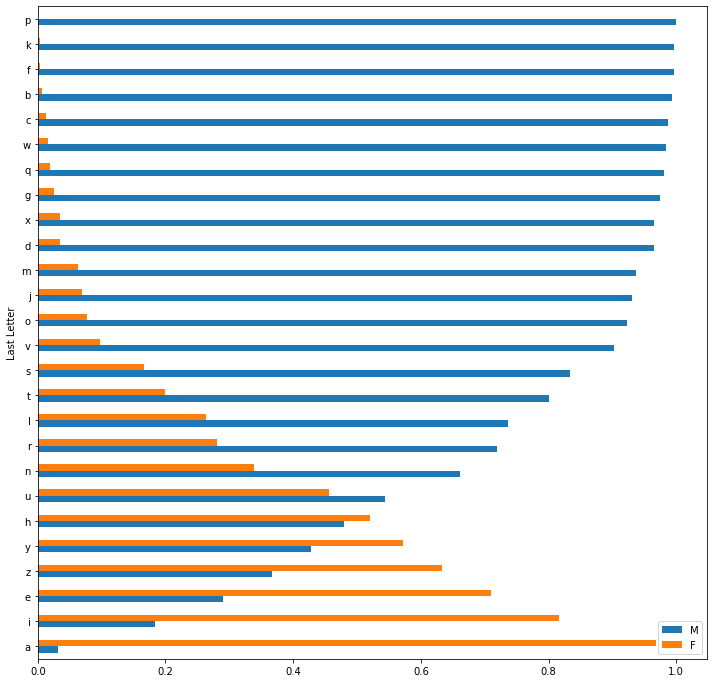

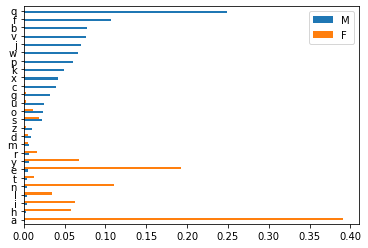

In [675]:
# your code to plot the graph as above (you need to consider all states, all years data)
### BEGIN SOLUTION
def filter_men_last_letter():

    men_group = baby_names[baby_names['Sex'] == 'M']
    men_group = men_group.groupby('Name')['Count'].sum()
    men_dict = dict()
    
    
    for name, name_counter in men_group.iteritems():
            if not name[-1] in men_dict:
                men_dict[name[-1]] = 1
            else:
                men_dict[name[-1]] += 1
    
    return men_dict
                
def filter_women_last_letter():          
    women_group = baby_names[baby_names['Sex'] == 'F']
    women_group = women_group.groupby('Name')['Count'].sum()
    women_dict = dict()
    
    for woman_name, name_counter in women_group.iteritems():
            if not woman_name[-1] in women_dict:
                women_dict[woman_name[-1]] = 1
            else:
                women_dict[woman_name[-1]] += 1
                
    return women_dict
    

def plot_results(men_list, women_list):
    import matplotlib
    men_letters = list(men_list.keys())
    men_val = list(men_list.values())
    sumkeymen = sum(men_list.values())

    men_val = [(t / sumkeymen) for t in men_list.values()]
    
    women_val = list(women_list.values())
    sumkey = sum(women_val)
    women_val = [(x / sumkey) for x in women_list.values()]
    women_letters = women_list.keys()
    
    
    
    
    display = pd.DataFrame({'M': men_letters, 'M': sorted(men_val), 'F': women_letters, 'F': women_val}, index = women_letters)
    dis = display.plot.barh()
    
    
    
    
x = filter_men_last_letter()
y = filter_women_last_letter()
plot_results(x, y)

    
        
    

### END SOLUTION